### HOMEWORK 13

In this homework you are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The objective of this homework is to go through the steps described below and to implement the necessary code.

At the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)

In [23]:
import os
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 0

Go to the GTSRB dataset official site ([link](https://benchmark.ini.rub.de/gtsrb_dataset.html)) to learn more about the dataset.

### Step 1

Download the dataset ([link](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)) and unzip it.

### Step 2

For this homework, you will be working with the training set. Check out the `Train.csv`, open it and see what it contains. Load the dataset and plot random samples.

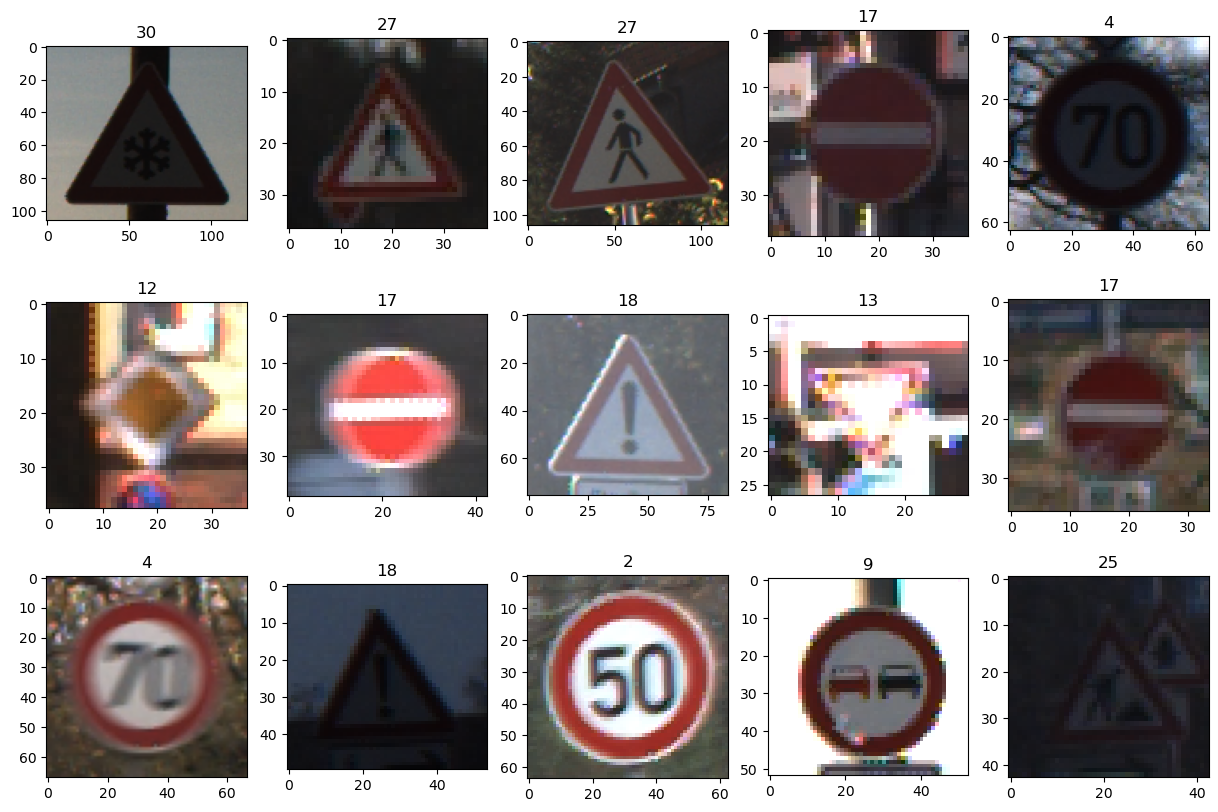

In [24]:
# Load the training labels
root = 'archive' # Path to the dataset location, e.g., '/data/janko/dataset/GTSRB'
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples (amount of samples in data)
num_samples = len(data)

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])

### Step 3

Inspect the dataset by computing and plotting the per-class histogram.

In [25]:
# Extract class identifiers
# Hint: Check the csv 
ids = data['ClassId']

Compute the per class histogram. You can use any approach you want (e.g. `numpy`). It's also worth looking at the `Counter` function from the `collections` module ([link](https://docs.python.org/3/library/collections.html#collections.Counter)) ;-)

(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts'))

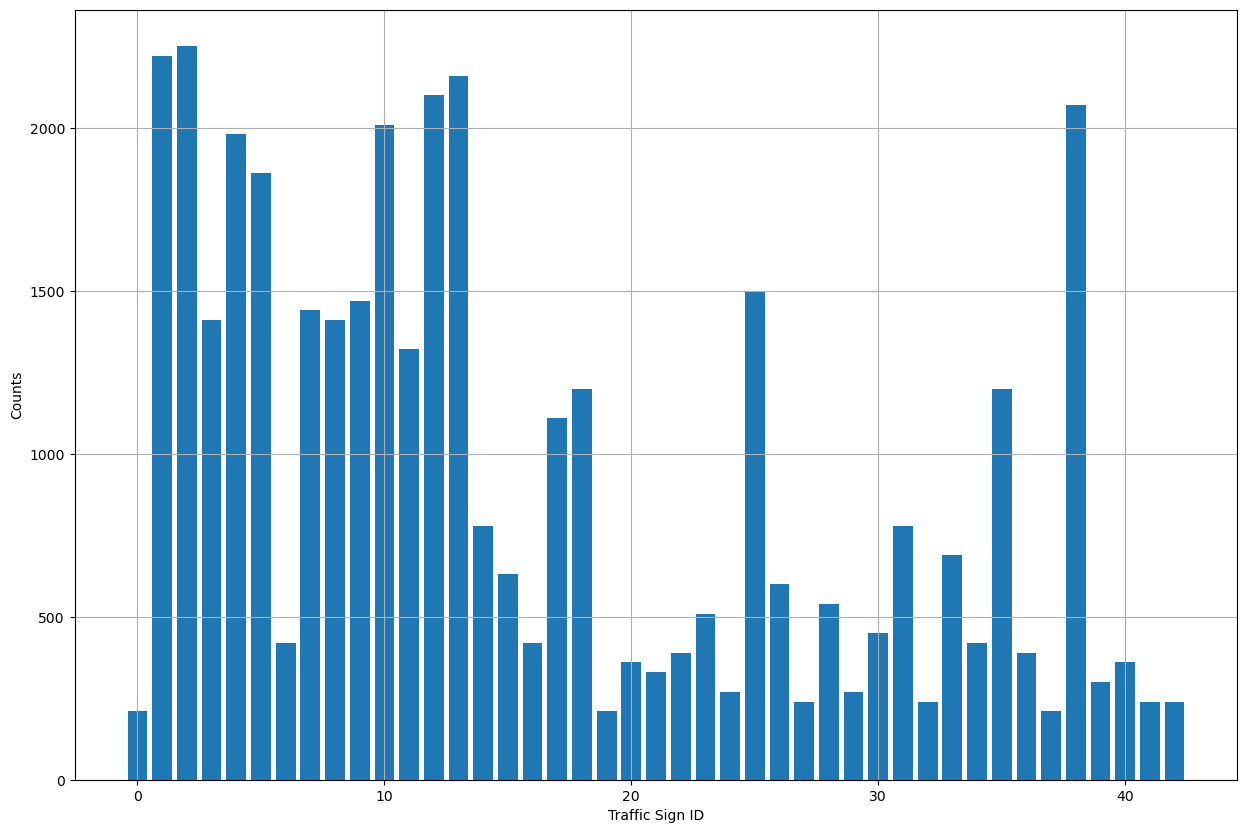

In [26]:
from collections import Counter
hist = Counter(ids)

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

### Questions

Please answer the following questions:
* Do you consider the dataset to be balanced? If so, why? If not, why?
  No, dataset is not balanced. Balanced dataset has more or less equal class representation.
* Are there any classes that are (significantly) over-represented or under-represeneted?

In [27]:
max_count = max(hist.values())
min_count = min(hist.values())
mean_count = np.mean(list(hist.values()))
std_count = np.std(list(hist.values()))

# Consider classes that are more than one standard deviation from the mean as significantly over/under represented
over_threshold = mean_count + std_count
under_threshold = mean_count - std_count

# Identify over-represented and under-represented classes
over_represented = [cls for cls, count in hist.items() if count > over_threshold]
under_represented = [cls for cls, count in hist.items() if count < under_threshold]

print(f"Over-represented classes: {over_represented}")
print(f"Under-represented classes: {under_represented}")

Over-represented classes: [1, 2, 4, 5, 10, 12, 13, 38]
Under-represented classes: [0, 19, 37]


### Optional

Perform a further analysis on the dataset and draw some conclusion from it.

Hint 1: Unlike MNIST or CIFAR10, this dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution?
Hint 2: What about the brightness distribution? Are there classes there are significantly more bright than others?

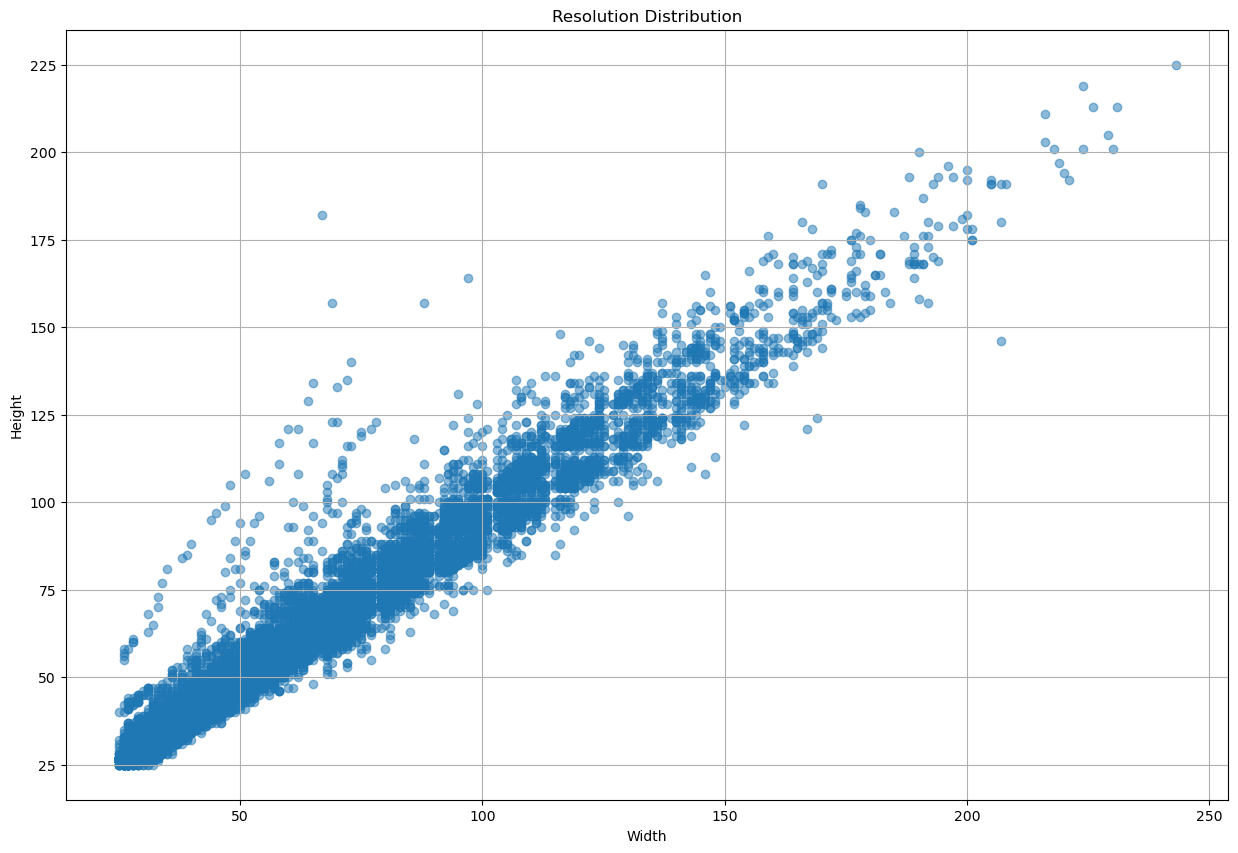

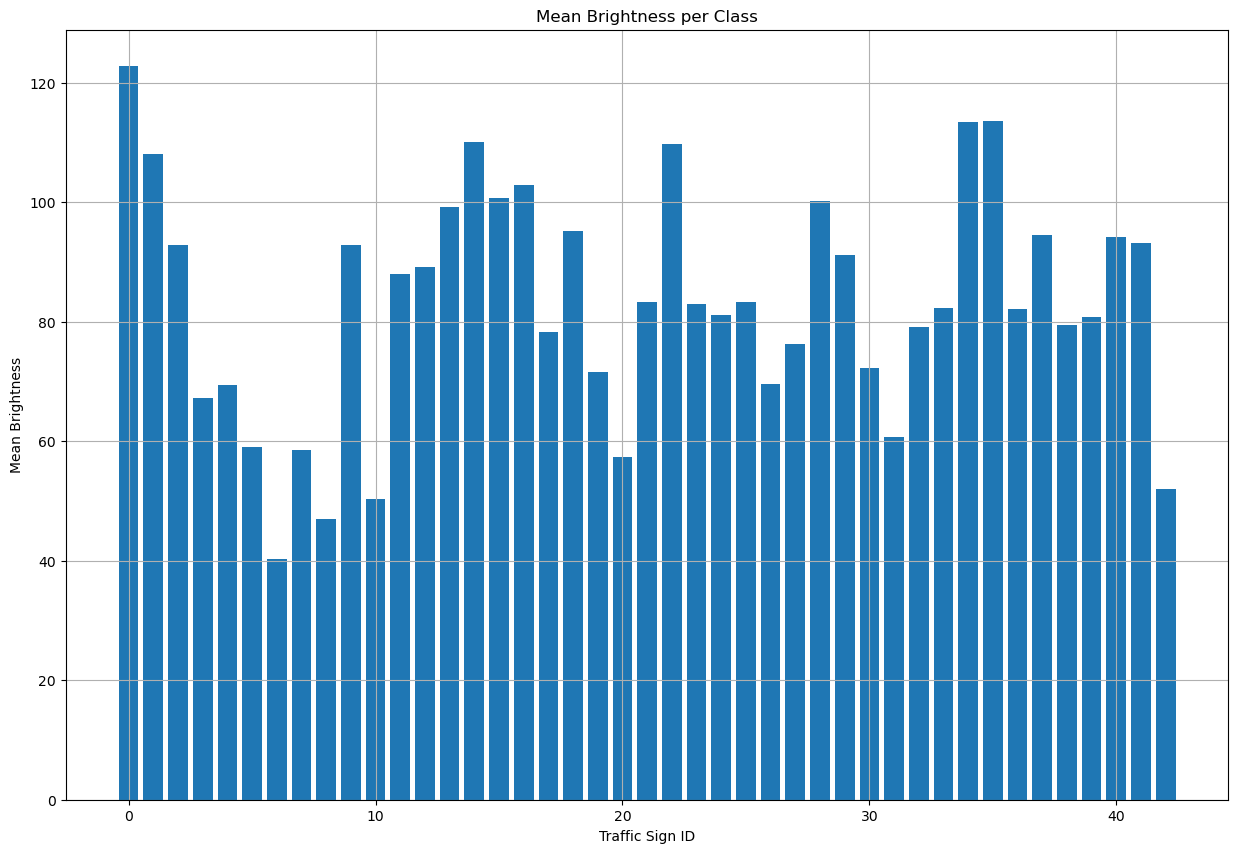

In [28]:
import os
import cv2
import numpy as np
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [15, 10]

root = 'archive' 
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples (amount of samples in data)
num_samples = len(data)

# Extract class identifiers
ids = data['ClassId']

# Initialize lists to store resolutions and brightness
resolutions = []
brightness = []

# Loop over each image in the dataset
for idx in range(num_samples):
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Get image resolution
    height, width = img.shape[:2]
    resolutions.append((width, height))
    
    # Convert image to grayscale to calculate brightness
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    brightness.append(np.mean(gray))

# Convert resolutions to a DataFrame for analysis
res_df = pd.DataFrame(resolutions, columns=['Width', 'Height'])

# Plot resolution distribution
plt.figure()
plt.scatter(res_df['Width'], res_df['Height'], alpha=0.5), plt.grid(True)
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Resolution Distribution')
plt.show()

# Compute brightness per class
class_brightness = data.copy()
class_brightness['Brightness'] = brightness

# Calculate mean brightness per class
mean_brightness_per_class = class_brightness.groupby('ClassId')['Brightness'].mean()

# Plot brightness distribution
plt.figure()
plt.bar(mean_brightness_per_class.index, mean_brightness_per_class.values), plt.grid(True)
plt.xlabel('Traffic Sign ID')
plt.ylabel('Mean Brightness')
plt.title('Mean Brightness per Class')
plt.show()

### So, I see that this dataset has various images resolutions. From this we can make steps like resizing before start working with it.
### With mean brightness I see that clearly under what conditions(e.g.: day/night) different classes were captured. We cound use brightness normalization as a preprocessing step. 
